### Importing necessary libraries

In [63]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import sweetviz

### Data Collection

In [64]:
cdf = pd.read_csv('zomato_restaurants_in_India.csv')

In [65]:
cdf.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [66]:
cdf.shape

(211944, 26)

### Data definition

In [67]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [68]:
cdf.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### Data cleaning

 Handling Duplicates

In [69]:
# Duplicate values need to remove to avoid deviation,since res_id is unique identifier for restaurants, we use to remove 
#duplicates
cdf = cdf.drop_duplicates(subset='res_id')
cdf.shape

(55568, 26)

Almost 75% of records got removed 

Handling missing Values

In [70]:
cdf.isnull().values.any()

True

In [71]:
cdf.isnull().sum() #Checking for null values

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [72]:
cdf.isnull().mean()*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.032393
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 80.303412
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.845811
timings                  1.804996
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.021595
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [73]:
# Its better to drop zipcode column since it has 80% of null values which cannot be imputed.
cdf.drop(['zipcode'], axis=1, inplace=True)

In [74]:
cdf.shape

(55568, 25)

* Identifying not useful columns from dataset for further analysis

In [75]:
#res_id - Unique ID for each restaurant
#name - Name is useful since we will use for finding top restaurants
cdf['name'].unique()

array(['Bikanervala', 'Mama Chicken Mama Franky House', 'Bhagat Halwai',
       ..., 'Red China', 'Wah Ustad', 'Geeta lodge'], dtype=object)

In [76]:
#establishment - Let's see what type of values we have in establishment
cdf['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

* Seems establishment column need some changes

In [77]:
print(cdf["establishment"].unique()[0])
print(type(cdf["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


In [78]:
# Removing [' '] from each value
cdf['establishment'] = cdf['establishment'].apply(lambda x:x[2:-2])
cdf['establishment'].unique()[0]

'Quick Bites'

In [79]:
cdf['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [80]:
# Changing ''  to 'NA'
print(cdf["establishment"].unique())
cdf["establishment"] = cdf["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(cdf["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [81]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [82]:
cdf['url']

0         https://www.zomato.com/agra/bikanervala-khanda...
1         https://www.zomato.com/agra/mama-chicken-mama-...
2         https://www.zomato.com/agra/bhagat-halwai-2-sh...
3         https://www.zomato.com/agra/bhagat-halwai-civi...
4         https://www.zomato.com/agra/the-salt-cafe-kitc...
                                ...                        
211882    https://www.zomato.com/vadodara/shree-janta-ic...
211925    https://www.zomato.com/vadodara/the-grand-thak...
211926    https://www.zomato.com/vadodara/geeta-lodge-al...
211940    https://www.zomato.com/vadodara/raju-omlet-kar...
211942    https://www.zomato.com/vadodara/subway-1-akota...
Name: url, Length: 55568, dtype: object

In [83]:
cdf['address']

0         Kalyani Point, Near Tulsi Cinema, Bypass Road,...
1               Main Market, Sadar Bazaar, Agra Cantt, Agra
2         62/1, Near Easy Day, West Shivaji Nagar, Goalp...
3         Near Anjana Cinema, Nehru Nagar, Civil Lines, ...
4               1C,3rd Floor, Fatehabad Road, Tajganj, Agra
                                ...                        
211882    Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...
211925    3rd Floor, Shreem Shalini Mall, Opposite Conqu...
211926    Shop 11, Ground Floor, Atlantis K-10, Tower A,...
211940    Mahalaxmi Apartment, Opposite B O B, Karoli Ba...
211942    G-2, Vedant Platina, Near Cosmos, Akota, Vadodara
Name: address, Length: 55568, dtype: object

In [84]:
# Dropping objective features ['url', 'address']
cdf.drop(['url','address'],axis=1,inplace=True)

In [85]:
cdf.shape

(55568, 23)

In [86]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'latitude', 'longitude', 'country_id', 'locality_verbose', 'cuisines',
       'timings', 'average_cost_for_two', 'price_range', 'currency',
       'highlights', 'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [87]:
cdf['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [88]:
#Still there are some features which are not necessary i.e we have columns like 'city_id, locality, locality_verbose'. In which
# column city is equivalent, similarly 'country_id' column is not required since this dataset belongs to indian restaurents, so 
#currency will be the same, so dropping 'locality', 'locality_verbose','latitude', 'longitude', 'country_id''currency' columns also.
cdf.drop(['locality', 'locality_verbose', 'latitude', 'longitude', 'country_id', 'currency'],axis=1, inplace=True)

In [89]:
cdf.drop(['city_id'],axis=1,inplace=True)

In [90]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [91]:
cdf['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [92]:
# Cuisines column has some missing values and also have to be seperated the unique cuisines 
cdf['cuisines'] = cdf["cuisines"].fillna("No cuisine")

In [93]:
cuisines = []
cdf["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [94]:
cuisines.unique()

array(['North Indian', 'South Indian', 'Mithai', 'Street Food',
       'Desserts', 'Mughlai', 'Rolls', 'Chinese', 'Fast Food', 'Bakery',
       'Continental', 'Italian', 'Pizza', 'Cafe', 'Burger', 'Wraps',
       'Beverages', 'Rajasthani', 'Mexican', 'Healthy Food', 'Sandwich',
       'Salad', 'Momos', 'Lebanese', 'Mediterranean', 'Thai', 'Gujarati',
       'Indian', 'Finger Food', 'European', 'Tea', 'Asian', 'Bar Food',
       'Kebab', 'Paan', 'Biryani', 'Juices', 'Ice Cream', 'Japanese',
       'Korean', 'Afghan', 'Awadhi', 'No cuisine', 'Hyderabadi',
       'Lucknowi', 'Roast Chicken', 'Drinks Only', 'Coffee', 'American',
       'BBQ', 'Maharashtrian', 'Modern Indian', 'Andhra', 'Konkan',
       'Kerala', 'Sushi', 'Parsi', 'Greek', 'Bengali', 'Seafood',
       'Frozen Yogurt', 'Arabian', 'Indonesian', 'Sindhi', 'Hot dogs',
       'Goan', 'Charcoal Chicken', 'Raw Meats', 'Grill', 'Malwani',
       'Cantonese', 'Pakistani', 'Steak', 'Vietnamese', 'Singaporean',
       'Middle Eastern'

In [95]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [96]:
#'timings' column
print(cdf.timings.nunique())
print(cdf.timings.unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


In [97]:
# since the 'timings' column has missing values and not structured properly, its better to drop this column
cdf.drop(['timings'],axis=1,inplace=True)

In [98]:
cdf.columns

Index(['res_id', 'name', 'establishment', 'city', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [99]:
cdf['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

In [100]:
cdf['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

In [101]:
print(cdf["highlights"].nunique())
print(cdf["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [102]:
# seperating highlights values
hl_sub = []
cdf['highlights'].apply(lambda x: hl_sub.extend(x[2:-2].split("', '")))
hl_sub = pd.Series(hl_sub)
print("Total number of unique highlights = ", hl_sub.nunique())
print(hl_sub.unique())

Total number of unique highlights =  104
['Lunch' 'Takeaway Available' 'Credit Card' 'Dinner' 'Cash'
 'Air Conditioned' 'Indoor Seating' 'Pure Veg' 'Delivery'
 'No Alcohol Available' 'Breakfast' 'Outdoor Seating' 'Self Service'
 'Digital Payments Accepted' 'Desserts and Bakes' 'Smoking Area'
 'Dance Floor' 'Serves Alcohol' 'Debit Card' 'Wine' 'Live Music' 'Rooftop'
 'Live Sports Screening' 'Fullbar' 'Beer' 'Serves Cocktails'
 'Table booking recommended' 'Available for Functions' 'Resto Bar'
 'Hookah' 'Wifi' 'DJ' 'Live Entertainment' 'City View' 'Free Parking'
 'Free Wifi' 'Table booking not available'
 'Table Reservation Not Required' 'Axis Bank - Dining Delights'
 'No Seating Available' 'Buffet' 'Serves Jain Food' 'Poolside'
 'Table reservation required' 'Restricted Entry' 'Valet Parking Available'
 'Sodexo' '4/5 Star' 'Karaoke' 'Kid Friendly'
 'Private Dining Area Available' 'Nightlife' 'Gluten Free Options'
 'Luxury Dining' 'Wheelchair Accessible' 'Above 18 Only'
 'Pre-Ordering Requ

In [103]:
cdf.columns


Index(['res_id', 'name', 'establishment', 'city', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [104]:
cdf[['aggregate_rating','votes','photo_count']].describe()

,aggregate_rating,votes,photo_count
count,55568.000000,55568.000000,55568.000000
mean,2.958593,223.330352,160.974770
std,1.464576,618.224019,586.975382
min,0.000000,-18.000000,0.000000
25%,2.900000,6.000000,1.000000
50%,3.500000,35.000000,10.000000
75%,3.900000,175.000000,69.000000
max,4.900000,42539.000000,17702.000000


In [105]:
cdf['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'İyi', 'Çok iyi', 'Baik',
       'Sangat Baik', 'Skvělé', 'Muy Bueno', 'Průměr', 'Ortalama',
       'Skvělá volba', 'Muito bom', 'Velmi dobré', 'Excelente', 'Bom',
       'Scarso', 'Promedio', 'Vynikajúce', 'Bueno', 'Dobré', 'Terbaik',
       'Harika', 'Veľmi dobré', 'Eccellente', 'Buono', 'Média', 'Dobrze'],
      dtype=object)

In [106]:
#dropping 'rating_text' since we use aggregate_rating 
cdf.drop(['rating_text'],axis=1,inplace=True)

In [107]:
cdf.opentable_support.unique()

array([ 0., nan])

In [108]:
#dropping 'opentable_support' since it has no true values
cdf.drop(['opentable_support'],axis=1,inplace=True)

In [109]:
cdf['delivery'].unique()

array([-1,  1,  0], dtype=int64)

In [110]:
cdf['takeaway'].unique()

array([-1], dtype=int64)

In [111]:
# Assuming -1 is a data entry error, so -1 is to be encoded as 1 for both delivery and takeaway

cdf['delivery'] = cdf['delivery'].replace(-1, 1)
cdf['takeaway'] = cdf['takeaway'].replace(-1, 1)

In [112]:
print(cdf.delivery.value_counts(normalize=True)) #99% offer delivery, 1% don't
print('****************************************')
print(cdf['takeaway'].value_counts(normalize=True)) #100% takeaways

1    0.994331
0    0.005669
Name: delivery, dtype: float64
****************************************
1    1.0
Name: takeaway, dtype: float64


In [113]:
# res_id now is just an identifier, and isn't of much use, so dropping this column.
cdf.drop(['res_id'],axis=1,inplace=True)

In [114]:
cdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,55568,41100,Domino's Pizza,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
establishment,55568,27,Quick Bites,14032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,55568,99,Bangalore,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisines,55568,9383,North Indian,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_cost_for_two,55568.0,NaN,NaN,NaN,528.205874,595.028447,0.0,200.0,350.0,600.0,30000.0
price_range,55568.0,NaN,NaN,NaN,1.714728,0.878227,1.0,1.0,1.0,2.0,4.0
highlights,55568,31228,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aggregate_rating,55568.0,NaN,NaN,NaN,2.958593,1.464576,0.0,2.9,3.5,3.9,4.9
votes,55568.0,NaN,NaN,NaN,223.330352,618.224019,-18.0,6.0,35.0,175.0,42539.0
photo_count,55568.0,NaN,NaN,NaN,160.974770,586.975382,0.0,1.0,10.0,69.0,17702.0


### Fixing incorrect Data Types

In [115]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55568 entries, 0 to 211942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   city                  55568 non-null  object 
 3   cuisines              55568 non-null  object 
 4   average_cost_for_two  55568 non-null  int64  
 5   price_range           55568 non-null  int64  
 6   highlights            55568 non-null  object 
 7   aggregate_rating      55568 non-null  float64
 8   votes                 55568 non-null  int64  
 9   photo_count           55568 non-null  int64  
 10  delivery              55568 non-null  int64  
 11  takeaway              55568 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.5+ MB


In [116]:
#delivery, takeaway and price_range columns are categorical and are stored as int, so this needs to be fixed.
#cdf['delivery'] = cdf['delivery'].astype(object)
#cdf['takeaway'] = cdf['takeaway'].astype(object)
#cdf['price_range'] = cdf['price_range'].astype(object)

In [117]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55568 entries, 0 to 211942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   city                  55568 non-null  object 
 3   cuisines              55568 non-null  object 
 4   average_cost_for_two  55568 non-null  int64  
 5   price_range           55568 non-null  int64  
 6   highlights            55568 non-null  object 
 7   aggregate_rating      55568 non-null  float64
 8   votes                 55568 non-null  int64  
 9   photo_count           55568 non-null  int64  
 10  delivery              55568 non-null  int64  
 11  takeaway              55568 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.5+ MB


### EDA Report by Sweetviz Package on the Cleaned Data

In [118]:
#report_trim = sweetviz.analyze(cdf)
#report_trim.show_html('cleaned_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report cleaned_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


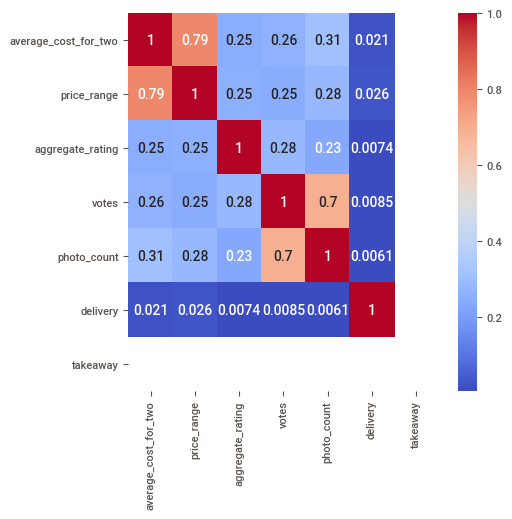

In [120]:
#Checking the correlation between the dataset columns
plt.figure(figsize=(5,5))
sns.heatmap(cdf.corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
# Price_range and avgerage_cost_per_two are highly correlted and photo_count and votes are also highly correlated.
# rest all remains inacceptable range

### Exploring The Dependent Variable(aggregate_rating)

In [122]:
cdf.aggregate_rating.value_counts()

0.0    10058
3.9     3537
3.8     3428
3.7     3324
4.0     3307
3.6     3004
3.2     2911
3.4     2789
3.3     2783
3.5     2757
4.1     2757
4.2     2194
3.1     1779
4.3     1612
3.0     1595
2.9     1488
2.8     1156
4.4     1070
2.7      856
4.5      682
2.6      570
4.6      428
2.5      396
2.4      300
4.7      239
2.3      167
4.8      142
4.9      130
2.2       65
2.1       28
2.0       10
1.9        4
1.8        2
Name: aggregate_rating, dtype: int64

In [ ]:
# Here in out dependent variable rating '0' represents not rated(reffered from rating text column)
# Replacing such values with NaN so that these NaN values can be filled with mean or median values so that model may not =